先週までのfunction_test_0627を、圧縮してデータの処理を完了させた後で、プロットを行うための関数を開発するためのテストを行う。

In [436]:
import cubesat
import datetime
import argparse

import os
import yaml
import glob
import math
import ephem
import pickle
import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 

import cubesat as cubesat
import importlib
importlib.reload(cubesat)

import skyfield.sgp4lib as sgp4lib
from astropy import coordinates as coord, units as u
from astropy.time import Time 

In [437]:
setup_yamlfile='C:/Users/Owner/Box/Per_201442_kentaro Taniguchi/ninjasat/data/ninjasat_setup.yaml'
data_yamlfile='C:/Users/Owner/Box/Per_201442_kentaro Taniguchi/ninjasat/data/ninjasat_data_setup.yaml'
input_start_date = '2021-08-02 00:00:00'
input_end_date = '2021-08-02 1:59:00'
timebin_minute = 20
fountname_base = 'orbit'
time_str = input_start_date
utc_time = datetime.datetime.strptime(time_str, '%Y-%m-%d %H:%M:%S')

ninjasat = cubesat.CubeSat(setup_yamlfile, data_yamlfile, input_start_date, input_end_date, timebin_minute, fountname_base)

init


In [438]:
ninjasat.setup_df()
ninjasat.simulate_orbit()
ninjasat.df

2021-08-02 00:20:00
2021-08-02 00:40:00
2021-08-02 01:00:00
2021-08-02 01:20:00
2021-08-02 01:40:00
2021-08-02 02:00:00


,Time,Longitude,Latitude,Altitude
0,2021-08-02 00:00:00,44.507280,-62.578004,596.302550
1,2021-08-02 00:20:00,23.335980,11.478172,566.809309
2,2021-08-02 00:40:00,-45.900124,81.813950,582.666970
3,2021-08-02 01:00:00,-162.641557,18.373317,581.837634
4,2021-08-02 01:20:00,178.795756,-55.648839,601.595373
5,2021-08-02 01:40:00,13.464296,-48.754634,589.098002
6,2021-08-02 02:00:00,-3.764353,25.731815,567.616234


## add ALL

In [439]:
ninjasat.add_position_TEME()
ninjasat.add_position_J2000()
ninjasat.add_sun_moon_position()
ninjasat.setup_maxi_rbm_index()
ninjasat.add_maxi_rbm_index()
ninjasat.set_cutoff_rigidity()
ninjasat.add_cutoff_rigidity()
ninjasat.add_observer_vis()

ninjasat.setup_target_df()
ninjasat.add_target_vis()

ninjasat.df

--set_cutoff_rigidity_map
file_cutoffrigidity: C:/Users/Owner/Box/Per_201442_kentaro Taniguchi/ninjasat/data/cor/cutrig-170312a400kp3.dat
get_cutoff_rigidity


,Time,Longitude,Latitude,Altitude,xTEME,yTEME,zTEME,xJ2000,yJ2000,zJ2000,...,xTargVec_Her X-1,yTargVec_Her X-1,zTargVec_Her X-1,visFlag_Galactic Center,visEl_Galactic Center,angDistMoon_Galactic Center,angDistSun_Galactic Center,xTargVec_Galactic Center,yTargVec_Galactic Center,zTargVec_Galactic Center
0,2021-08-02 00:00:00,44.507280,-62.578004,596.302550,3209.048937,-262.764528,-6167.769845,3194.947107,-278.310596,-6174.405400,...,-0.21856,-0.154993,-0.963436,0.0,1.447645,1.938882,1.82129,-0.054661,0.030307,-0.998045
1,2021-08-02 00:20:00,23.335980,11.478172,566.809309,6361.610972,-2421.465145,1373.676933,6352.685572,-2452.125011,1360.531381,...,-0.21856,-0.154993,-0.963436,0.0,0.149985,1.938882,1.82129,-0.054661,0.030307,-0.998045
2,2021-08-02 00:40:00,-45.900124,81.813950,582.666970,85.587817,-990.436079,6868.281063,95.048972,-990.768698,6868.108638,...,-0.21856,-0.154993,-0.963436,2.0,-1.043033,1.938882,1.82129,-0.054661,0.030307,-0.998045
3,2021-08-02 01:00:00,-162.641557,18.373317,581.837634,-6325.561087,1908.455090,2181.038636,-6311.740732,1938.982710,2194.111977,...,-0.21856,-0.154993,-0.963436,0.0,0.154061,1.938882,1.82129,-0.054661,0.030307,-0.998045
4,2021-08-02 01:20:00,178.795756,-55.648839,601.595373,-3406.200809,1993.441708,-5739.152021,-3408.433991,2009.799655,-5732.116805,...,-0.21856,-0.154993,-0.963436,0.0,1.445182,1.938882,1.82129,-0.054661,0.030307,-0.998045
5,2021-08-02 01:40:00,13.464296,-48.754634,589.098002,4522.027571,-850.817810,-5215.550227,4507.043991,-872.684228,-5224.898651,...,-0.21856,-0.154993,-0.963436,0.0,1.203038,1.938882,1.82129,-0.054661,0.030307,-0.998045
6,2021-08-02 02:00:00,-3.764353,25.731815,567.616234,5768.434841,-2433.190981,2998.762308,5762.830811,-2460.971919,2986.843344,...,-0.21856,-0.154993,-0.963436,1.0,-0.098654,1.938882,1.82129,-0.054661,0.030307,-0.998045


In [430]:
# ninjasat.df.to_csv('test.csv')

## Plot ground station visibility map

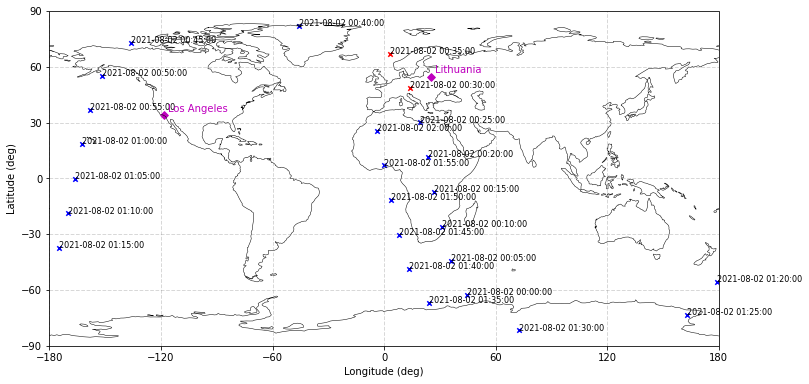

In [431]:
ninjasat.plot_observer_vis()

## Plot COR Map

plot_cutoff_rigidity_map


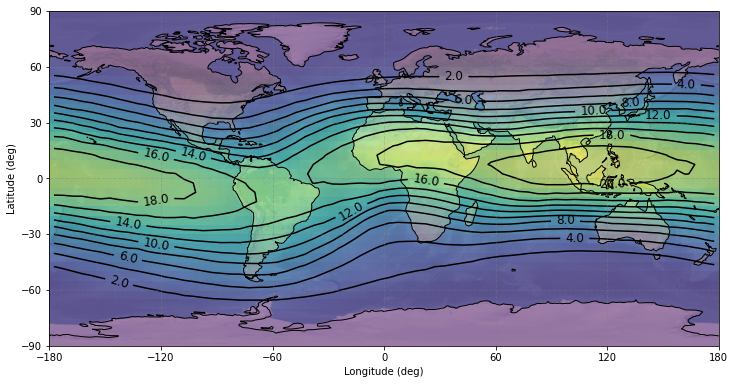

In [357]:
ninjasat.plot_cutoff_rigidity_map()

## Plot maxi rbm map

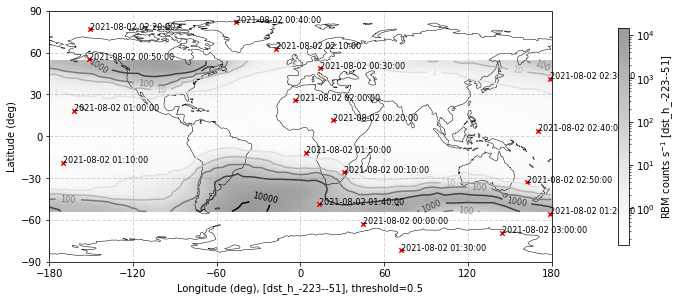

In [358]:
ninjasat.plot_maxi_rbm_map()

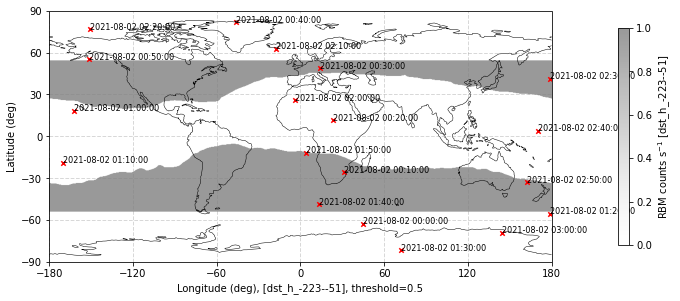

In [359]:
ninjasat.plot_maxi_rbm_flag()

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

# 地球の半径を天文単位に変換（1天文単位＝約149597870.7キロメートル）
earth_radius = 6378.137
scale = earth_radius/3

# 衛星の位置
sco_ra = df.loc[0]["RA (radians)"]
sco_dec = df.loc[0]["DEC (radians)"]

# 方向ベクトルを求める
xVect = get_direction_vector(sco_ra, sco_dec)*scale

# 3Dプロットの準備
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 地球を描画（半径は地球の半径、中心は原点）
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = earth_radius * np.outer(np.cos(u), np.sin(v))
y = earth_radius * np.outer(np.sin(u), np.sin(v))
z = earth_radius * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_wireframe(x, y, z, color='lightblue', alpha=0.3)


for index, row in ninjasat.df.iterrows():
    datetime_value = ninjasat.str2datetime(row['Time'])
    
    # in TEME coor.
    p, v = ninjasat.orbital_orbit.get_position(time_datetime, False)
    ninjasat.df.loc[index, 'xTEME'] = p[0]
    ninjasat.df.loc[index, 'yTEME'] = p[1]
    ninjasat.df.loc[index, 'zTEME'] = p[2]
    
    
    mjd_value = datetime2mjd(datetime_value)
    satVect, velVect = TEME2J2000(datetime_value)
    print(satVect)
    moonVect = atMoon(mjd)[0] / np.linalg.norm(atMoon(mjd)[0])*scale
    print(moonVect)
    sunVect = atSun(mjd)/ np.linalg.norm(atSun(mjd))*scale
    print(sunVect)
    earthVect = -satVect
    
    earthSize = np.arcsin(Earth_radius / np.linalg.norm(satVect))
    d1 = np.dot(earthVect, xVect)/np.linalg.norm(earthVect)/np.linalg.norm(xVect)
    if d1 > 1.0:
        d1=1.0
    elif d1 < -1.0:
        d1 = -1.0
    xVectDist = np.arccos(d1)
    AngDist = xVectDist - earthSize
    print("xVectDist: %.3f, earthSize: %.3f" % (xVectDist, earthSize))
    
    # xVectDistとAngDistをDataFrameの新しい列に追加
    ninjasat.df.loc[index, 'xJ2000'] = satVect[0]
    ninjasat.df.loc[index, 'yJ2000'] = satVect[1]
    ninjasat.df.loc[index, 'zJ2000'] = satVect[2]
    ninjasat.df.loc[index, 'xVectDist'] = xVectDist
    ninjasat.df.loc[index, 'earthSize'] = earthSize
    ninjasat.df.loc[index, 'AngDist_Flag'] = AngDist>0

    # 衛星の位置をプロット # xVectを描画
    if AngDist > 0:
        ax.scatter(satVect[0], satVect[1], satVect[2], color='r')
        ax.quiver(satVect[0], satVect[1], satVect[2], 
              xVect[0], xVect[1], xVect[2], color='b')
        ax.quiver(satVect[0], satVect[1], satVect[2], 
              moonVect[0], moonVect[1], moonVect[2], color='y')
        ax.quiver(satVect[0], satVect[1], satVect[2], 
              sunVect[0], sunVect[1], sunVect[2], color='g')
    else:
        ax.scatter(satVect[0], satVect[1], satVect[2], color='k')
        ax.quiver(satVect[0], satVect[1], satVect[2], 
              xVect[0], xVect[1], xVect[2], color='b')
        ax.quiver(satVect[0], satVect[1], satVect[2], 
              moonVect[0], moonVect[1], moonVect[2], color='y')
        ax.quiver(satVect[0], satVect[1], satVect[2], 
              sunVect[0], sunVect[1], sunVect[2], color='g')
        
    ax.plot([0, satVect[0]], [0, satVect[1]], [0, satVect[2]], color='black')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()
ninjasat.df

NameError: name 'df' is not defined

<IPython.core.display.Javascript object>


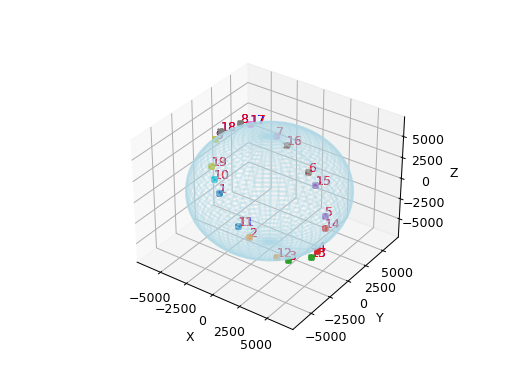

2021-08-02 00:00:00
p, v in TEME : [ -439.02975332 -5802.86761114  3500.67309214], [ 5.32798219 -3.14129242 -4.52582455]
p, v in J2000 : [ -559.56288087 -5791.73412447  3501.91903799], [ 5.24808283 -3.25801159 -4.53664841]
[ -559.56288087 -5791.73412447  3501.91903799]
[2053.99782828 -402.9173333  -372.5865278 ]
[  359.67102981 -1922.40194481  -833.71319389]
xVectDist: 1.011, earthSize: 1.220
2021-08-02 00:10:00
p, v in TEME : [ 2615.9985585  -6268.03924324   214.67615084], [ 4.46378668  1.65042166 -6.0050579 ]
p, v in J2000 : [ 2751.90564475 -6209.7629381    209.06897804], [ 4.41446719  1.74686208 -6.01422874]
[ 2751.90564475 -6209.7629381    209.06897804]
[2053.99782828 -402.9173333  -372.5865278 ]
[  359.67102981 -1922.40194481  -833.71319389]
xVectDist: 1.269, earthSize: 1.219
2021-08-02 00:20:00
p, v in TEME : [ 4518.63703841 -3971.28183578 -3166.54511117], [ 1.63610646  5.70952256 -4.83213952]
p, v in J2000 : [ 4762.19154255 -3667.21618954 -3176.35406976], [ 1.24909224  5.8042565

,Time,Longitude,Latitude,Altitude,q1,q2,q3,q4,xTEME,yTEME,zTEME,xJ2000_2,yJ2000_2,zJ2000_2,xJ2000,yJ2000,zJ2000
0,2021-08-02 00:00:00,-45.138254,31.188609,418.791166,0,0,0,0,-439.029753,-5802.867611,3500.673092,-459.792141,-5800.638933,3501.701144,-559.562881,-5791.734124,3501.919038
1,2021-08-02 00:10:00,-20.665024,1.821786,417.315202,0,0,0,0,2615.998558,-6268.039243,214.676151,2586.151378,-6280.590901,209.402154,2751.905645,-6209.762938,209.068978
2,2021-08-02 00:20:00,2.863484,-27.910222,424.768953,0,0,0,0,4518.637038,-3971.281836,-3166.545111,4492.855518,-3993.084653,-3175.797902,4762.191543,-3667.216190,-3176.354070
3,2021-08-02 00:30:00,42.595558,-49.453415,433.402300,0,0,0,0,4435.404614,71.824909,-5152.821428,4425.031150,50.352955,-5161.986584,4390.477321,554.788727,-5161.924053
4,2021-08-02 00:40:00,98.640896,-45.973795,432.130002,0,0,0,0,2407.537666,4083.915018,-4873.933142,2417.135052,4072.188050,-4878.992356,1747.050795,4403.006273,-4877.619608
5,2021-08-02 00:50:00,132.772181,-21.262847,422.737955,0,0,0,0,-675.757270,6304.419351,-2451.843983,-650.388895,6307.578406,-2450.579347,-1900.034982,6050.705585,-2448.003094
6,2021-08-02 01:00:00,155.183597,8.951722,417.207974,0,0,0,0,-3461.140682,5752.044330,1050.806175,-3431.154630,5768.696665,1057.837013,-4729.297612,4762.219291,1060.525309
7,2021-08-02 01:10:00,-177.803575,37.197810,420.182697,0,0,0,0,-4721.194007,2665.036379,4088.930707,-4699.806689,2687.843278,4098.629249,-5270.623801,1234.263039,4099.825066
8,2021-08-02 01:20:00,-128.613936,51.788578,423.374869,0,0,0,0,-3901.412420,-1596.306363,5320.944566,-3898.057049,-1577.392112,5329.038313,-3168.209676,-2767.912901,5327.548176
9,2021-08-02 01:30:00,-78.194364,38.427602,420.228350,0,0,0,0,-1364.005609,-5154.862027,4203.917980,-1380.172792,-5148.167652,4206.843604,610.261397,-5298.170260,4202.738766


In [333]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

######
from skyfield.api import EarthSatellite
from skyfield.api import load
ts = load.timescale()
line1 = '1 25544U 98067A   20214.25183516  .00000626  00000-0  19413-4 0  9996'
line2 = '2 25544  51.6438 125.4171 0000640 338.8146 125.0994 15.49126788239008'
satellite = EarthSatellite(line1, line2, 'ISS', ts)
######

# 地球の半径を天文単位に変換（1天文単位＝約149597870.7キロメートル）
earth_radius = 6378.137
scale = earth_radius/3

# 衛星の位置
sco_ra = df.loc[0]["RA (radians)"]
sco_dec = df.loc[0]["DEC (radians)"]

# 方向ベクトルを求める
xVect = get_direction_vector(sco_ra, sco_dec)*scale

# 3Dプロットの準備
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 地球を描画（半径は地球の半径、中心は原点）
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = earth_radius * np.outer(np.cos(u), np.sin(v))
y = earth_radius * np.outer(np.sin(u), np.sin(v))
z = earth_radius * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_wireframe(x, y, z, color='lightblue', alpha=0.3)


for index, row in ninjasat.df.iterrows():
    datetime_value = ninjasat.str2datetime(row['Time'])
    print(datetime_value)
    
    # in TEME coor.
    p, v = ninjasat.orbital_orbit.get_position(datetime_value, False)
    ninjasat.df.loc[index, 'xTEME'] = p[0]
    ninjasat.df.loc[index, 'yTEME'] = p[1]
    ninjasat.df.loc[index, 'zTEME'] = p[2]
    
    scatter1 = ax.scatter(p[0], p[1], p[2], marker="x")
    ax.text(p[0], p[1], p[2], str(index+1), color='blue')
    color = scatter1.get_facecolor()[0]
    
    
    # To J2000 through skyfield only
    
    year = datetime_value.year
    month = datetime_value.month
    day = datetime_value.day
    hour = datetime_value.hour
    minute = datetime_value.minute
    second = datetime_value.second
    
    t = ts.utc(year, month, day, hour, minute, second)  
    geocentric = satellite.at(t)
    
    
    ninjasat.df.loc[index, 'xJ2000_2'] = geocentric.position.km[0]
    ninjasat.df.loc[index, 'yJ2000_2'] = geocentric.position.km[1]
    ninjasat.df.loc[index, 'zJ2000_2'] = geocentric.position.km[2]
    
    ax.scatter(geocentric.position.km[0], geocentric.position.km[1], geocentric.position.km[2], color=color)
#     ax.scatter(geocentric.position.km[0], geocentric.position.km[1], geocentric.position.km[2], color='red')
    ax.text(geocentric.position.km[0], geocentric.position.km[1], geocentric.position.km[2], str(index+1), color='red')
    
    
    # To J2000 through skyfield and astropy
    mjd_value = datetime2mjd(datetime_value)
    satVect, velVect = TEME2J2000(datetime_value)
    print(satVect)
    moonVect = atMoon(mjd)[0] / np.linalg.norm(atMoon(mjd)[0])*scale
    print(moonVect)
    sunVect = atSun(mjd)/ np.linalg.norm(atSun(mjd))*scale
    print(sunVect)
    earthVect = -satVect
    
    earthSize = np.arcsin(Earth_radius / np.linalg.norm(satVect))
    d1 = np.dot(earthVect, xVect)/np.linalg.norm(earthVect)/np.linalg.norm(xVect)
    if d1 > 1.0:
        d1=1.0
    elif d1 < -1.0:
        d1 = -1.0
    xVectDist = np.arccos(d1)
    AngDist = xVectDist - earthSize
    print("xVectDist: %.3f, earthSize: %.3f" % (xVectDist, earthSize))
    
    # xVectDistとAngDistをDataFrameの新しい列に追加
    ninjasat.df.loc[index, 'xJ2000'] = satVect[0]
    ninjasat.df.loc[index, 'yJ2000'] = satVect[1]
    ninjasat.df.loc[index, 'zJ2000'] = satVect[2]

#     ax.scatter(satVect[0], satVect[1], satVect[2], color=color)
#     ax.text(satVect[0], satVect[1], satVect[2], str(index+1), color='blue')
    

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()
ninjasat.df

In [323]:
ninjasat.df.to_csv("/Users/Owner/Box/Ext_KentaroTaniguchi/Operation_2023/Operation_230614.csv")

## Datetime形式の時刻をMJDに変換する

In [233]:
def datetime2mjd(t_datetime):
    julian_day = t_datetime.toordinal() + 1721425.5
    mjd = julian_day - 2400000.5
    return mjd

def datetime2jd(t_datetime):
    julian_day = t_datetime.toordinal() + 1721425.5
    return julian_day

In [33]:
datetime_value = '2004-01-01 00:00:00'
datetime2mjd(ninjasat.str2datetime(datetime_value))
# 53005

NameError: name 'datetime2mjd' is not defined

## skyfieldで検証

In [38]:
from skyfield.api import EarthSatellite
from skyfield.api import load
ts = load.timescale()
line1 = '1 25544U 98067A   20214.25183516  .00000626  00000-0  19413-4 0  9996'
line2 = '2 25544  51.6438 125.4171 0000640 338.8146 125.0994 15.49126788239008'
satellite = EarthSatellite(line1, line2, 'ISS', ts)
print(satellite)
datetime_value = '2004-01-01 00:00:00'
datetime_value = ninjasat.str2datetime('2004-01-01 00:00:00')

# You can instead use ts.now() for the current time
t = ts.utc(2021, 8, 2, 0, 0, 0)

year = datetime_value.year
month = datetime_value.month
day = datetime_value.day
hour = datetime_value.hour
minute = datetime_value.minute
second = datetime_value.second

t = ts.utc(year, month, day, hour, minute, second)
print(year, month, day, hour, minute, second)

geocentric = satellite.at(t)
print(geocentric.position.km)
print(geocentric.position.km[0])

x_pos, y_pos, z_pos = satellite.at(t)

# input_start_date = '2021-08-02 00:00:00'
# input_end_date = '2021-08-02 2:59:00'

ISS catalog #25544 epoch 2020-08-01 06:02:39 UTC
2004 1 1 0 0 0
[  230.5765797  -6333.29794093 -2549.61333912]
230.576579697687


ValueError: not enough values to unpack (expected 3, got 0)

## TEME2J2000

In [85]:
import skyfield.sgp4lib as sgp4lib
from astropy import coordinates as coord, units as uni
from astropy.time import Time 

def TEME2J2000(time_datetime):

    # time- J2000 date
#     time = ninjasat.str2datetime('2004-01-01 00:00:00')
    time_jd = datetime2jd(time_datetime)

    # p,v- vectors, result of SGP4 in TEME frame
    p, v = ninjasat.orbital_orbit.get_position(time_datetime, False)
    print("p, v in TEME : {}, {}".format(p,v))

    # date= datetime.datetime(2000, 1, 1, 12, 0) + datetime.timedelta(days=time - 2451545)
    # T0 = 2451545.0

    # Conversion from TEME to ITRS    
    p,v= sgp4lib.TEME_to_ITRF(time_jd,p,v*86400)
    v=v/86400

    # Conversion from ITRS to J2000    
    now = Time(time_datetime)
    itrs = coord.ITRS(p[0]*uni.km, p[1]*uni.km, p[2]*uni.km, v[0]*uni.km/uni.s, v[1]*uni.km/uni.s, v[2]*uni.km/uni.s, obstime=now)
    gcrs = itrs.transform_to(coord.GCRS(obstime=now))
    p,v=gcrs.cartesian.xyz.value,gcrs.velocity.d_xyz.value
    print("p, v in J2000 : {}, {}".format(p,v))
    return p,v

In [87]:
time_datetime = ninjasat.str2datetime('2021-01-01 00:00:00')
TEME2J2000(time_datetime)
time_datetime = ninjasat.str2datetime('2021-02-01 00:00:00')
TEME2J2000(time_datetime)
time_datetime = ninjasat.str2datetime('2021-03-01 00:00:00')
TEME2J2000(time_datetime)

p, v in TEME : [-3206.51018273 -4479.39762674  3972.0112059 ], [ 3.08472298 -5.76397476 -3.99932756]
p, v in J2000 : [-3295.90316723 -4408.06366225  3978.64056332], [ 2.94965664 -5.83018173 -4.00525354]
p, v in TEME : [ 3505.31530785 -5762.43027613   831.60871392], [3.7073911  3.11980147 5.93561263]
p, v in J2000 : [ 3379.78196744 -5837.90752249   824.81559105], [3.78688412 3.03778008 5.92796751]
p, v in TEME : [-3924.90941967 -2561.68649397  4912.02826583], [ 5.80052795 -4.44339258  2.31216326]
p, v in J2000 : [-3970.22505325 -2474.89654576  4920.09892631], [ 5.7062889  -4.56960305  2.30064472]


(array([-3970.22505325, -2474.89654576,  4920.09892631]),
 array([ 5.7062889 , -4.56960305,  2.30064472]))

In [37]:
import skyfield.sgp4lib as sgp4lib
from astropy import coordinates as coord, units as u
from astropy.time import Time 

# time- J2000 date
time = ninjasat.str2datetime('2004-01-01 00:00:00')
time_jd = datetime2jd(time)

# p,v- vectors, result of SGP4 in TEME frame
p, v = ninjasat.orbital_orbit.get_position(time, False)

print(p, v)

# date= datetime.datetime(2000, 1, 1, 12, 0) + datetime.timedelta(days=time - 2451545)
# T0 = 2451545.0

# Conversion from TEME to ITRS    
p,v= sgp4lib.TEME_to_ITRF(time_jd,p,v*86400)
v=v/86400

# Conversion from ITRS to J2000    
now = Time(time)
itrs = coord.ITRS(p[0]*u.km, p[1]*u.km, p[2]*u.km, v[0]*u.km/u.s, v[1]*u.km/u.s, v[2]*u.km/u.s, obstime=now)
gcrs = itrs.transform_to(coord.GCRS(obstime=now))
p,v=gcrs.cartesian.xyz.value,gcrs.velocity.d_xyz.value
print(p,v)

[  237.37298752 -6333.09256594 -2549.49932808] [ 5.18439499 -1.92304702  5.27132976]
[  121.62193709 -6336.42436583 -2549.37022975] [ 5.15060923 -2.01655054  5.2695087 ]


## 座標変換系の関数

In [12]:
def atPrecession(mjd0, x0, mjd):
    rm = np.zeros((3, 3))
    rm = atPrecessRM(mjd0, mjd)
    x = np.dot(rm, x0)
    return x

In [13]:
def atPrecessRM(mjd0, mjd):
    RmAto2000 = np.zeros((3, 3))
    RmBto2000 = np.zeros((3, 3))
    Rm2000toB = np.zeros((3, 3))
    rm = np.zeros((3, 3))

    RmAto2000 = atPrecessRMJ2000(mjd0)
    RmBto2000 = atPrecessRMJ2000(mjd)
    Rm2000toB = np.transpose(RmBto2000)
    rm = np.dot(RmAto2000, Rm2000toB)

    return rm

In [14]:
import math

# assuming ARCSEC2RAD is calculated based on a DEG2RAD value
# typically, DEG2RAD is pi/180 as there are 180 degrees in pi radians
DEG2RAD = math.pi / 180
ARCSEC2RAD = DEG2RAD / 3600

MJD_J2000 = 51544.5  # The value depends on the context, this is a commonly used value

def atPrecessRMJ2000(mjd):
    t = (mjd - MJD_J2000) / 36525.0

    zeta = (2306.2181 + (0.30188 + 0.017998*t)*t)*t * ARCSEC2RAD
    z = (2306.2181 + (1.09468 + 0.018203*t)*t)*t * ARCSEC2RAD
    theta = (2004.3109 - (0.42665 + 0.041833*t)*t)*t * ARCSEC2RAD

    cos_zeta = math.cos(zeta)
    sin_zeta = math.sin(zeta)

    cos_z = math.cos(z)
    sin_z = math.sin(z)

    cos_theta = math.cos(theta)
    sin_theta = math.sin(theta)

    rm = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
    rm[0][0] = cos_zeta*cos_theta*cos_z - sin_zeta*sin_z
    rm[1][0] = -sin_zeta*cos_theta*cos_z - cos_zeta*sin_z
    rm[2][0] = -sin_theta*cos_z
    rm[0][1] = cos_zeta*cos_theta*sin_z + sin_zeta*cos_z
    rm[1][1] = -sin_zeta*cos_theta*sin_z + cos_zeta*cos_z
    rm[2][1] = -sin_theta*sin_z
    rm[0][2] = cos_zeta*sin_theta
    rm[1][2] = -sin_zeta*sin_theta
    rm[2][2] = cos_theta

    return rm


/*
 * calc position of planets, sun and moon (PLANETS, MOON in SOLARSYS)
 
 */
 
int atSun(

	double mjd,	/* input: time in MJD */
    
	AtVect pos);	/* output: vector to the sun in A.U.*/

In [15]:
def atSun(mjd):
    MJD_B1950 = 33281.923
    DEG2RAD = np.pi / 180.0

    rm1950_2000 = atPrecessRMJ2000(MJD_B1950)

    t = mjd - 4.5e4
    m = ( np.fmod(t * .985600267, 360.0) + 27.26464 ) * DEG2RAD
    sin_2m = np.sin(2*m)

    l = ( np.fmod(t * .985609104, 360.0) - 50.55138
          + np.sin(m) * 1.91553 + sin_2m * .0201 ) * DEG2RAD
    sin_l = np.sin(l)

    r = 1.00014 - np.cos(m) * .01672 - sin_2m * 1.4e-4

    x = np.array([r * np.cos(l), r * .91744 * sin_l, r * .39788 * sin_l])

    pos = np.dot(rm1950_2000, x)
    return pos

In [16]:
mjd = 58849.0
pos = atSun(mjd)
print(pos)
# assert_array_almost_equal(pos, [ 0.16637608, -0.8892618 , -0.38565779])
# mjd = np.array([62502.0, 69807.0], dtype=np.double)
# pos = at.atSun(mjd)
# assert_array_almost_equal(pos, [
#     [ 0.17387436, -0.88804621, -0.38513053],
#     [ 0.17164496, -0.88841461, -0.38529032]])

[ 0.16637608 -0.8892618  -0.38565779]


/*
 * calc position of the moon from the earth center in TOD coordinate.
 
 */
 
int atMoon(

	double mjd,	/* input: time in MJD */
    
	AtVect pos,	/* output: vector to the moon (km) */
    
	double *size,	/* output: their visual size (radian)*/
    
	double *phase,	/* output: phase (radian 0:new, pi:full)*/
    
	double *distan);/* output: distance to moon (km)*/


In [17]:
import math

def atMoon(mjd):  # input: time in MJD
    ta, a, b, c, d, e, g, j, l, m, n, v, w = moonag(mjd)
    mx, my, mz = moonth(ta, a, b, c, d, e, g, j, l, m, n, v, w)

    r_xy = math.sqrt(my - mx * mx)
    sin_delta = mz / r_xy
    cos_delta = math.sqrt(1. - sin_delta * sin_delta)
    sin_c = math.sin(c)
    cos_c = math.cos(c)

    # R.A. of moon = mean longitude (c) + delta
    distan = Earth_radius * math.sqrt(my)
    x_tod = [0, 0, 0]
    x_tod[0] = Earth_radius * r_xy * (cos_delta * cos_c - sin_delta * sin_c)
    x_tod[1] = Earth_radius * r_xy * (sin_delta * cos_c + cos_delta * sin_c)
    x_tod[2] = Earth_radius * mx

    size = math.atan(Moon_radius / distan)
    phase = d % (np.pi * 2)
    pos = atPrecession(mjd, x_tod, MJD_J2000)

    return pos, size, phase, distan  # return as a tuple


In [18]:
import numpy as np

def moonag(mjd):
    DEG2RAD = np.pi / 180.0
    ta = (mjd - 15019.5) / 36525.
    tb = ta * ta

    a = DEG2RAD*(ta * 4.77e5 +296.1044608 + ta * 198.849108 + tb * .009192)
    b = DEG2RAD*(ta * 483120. + 11.250889 + ta * 82.02515 - tb * .003211)
    c = DEG2RAD*(ta * 480960. +270.434164 + ta * 307.883142 - tb * .001133)
    d = DEG2RAD*(ta * 444960 + 350.737486 + ta * 307.114217 - tb * .001436)
    e = DEG2RAD*(ta * 35640 + 98.998753 + ta * 359.372886)
    g = DEG2RAD*(ta * 35999.04975 + 358.475833 - tb * 1.5e-4)
    j = DEG2RAD*(ta * 2880 + 225.444651 + ta * 154.906654)
    l = DEG2RAD*(ta * 36000.76892 + 279.696678 + tb * 3.03e-4)
    m = DEG2RAD*(ta * 19080 + 319.529425 + ta * 59.8585 + tb * 1.81e-4)
    n = DEG2RAD*(259.183275 - ta * 1800 - ta * 134.142008 + tb * .002078)
    v = DEG2RAD*(ta * 58320 + 212.603219 + ta * 197.803875 + tb * .001286)
    w = DEG2RAD*(ta * 58320 + 342.767053 + ta * 199.211911 * 3.1e-4 * tb)

    return ta, a, b, c, d, e, g, j, l, m, n, v, w


In [19]:
import math

def moonth(ta, a, b, c, d, e, g, j, l, m, n, v, w):
    # MOON THETA
    mx = math.sin(a + b - d * 4.0) * -0.00101
    mx -= math.sin(a - b - d * 4.0 - n) * 0.00102
    mx -= ta * 0.00103 * math.sin(a - b - n)
    mx -= math.sin(a - g - b - d * 2.0 - n) * 0.00107
    mx -= math.sin(a * 2.0 - b - d * 4.0 - n) * 0.00121
    mx += math.sin(a * 3.0 + b + n) * 0.0013
    mx -= math.sin(a + b - n) * 0.00131
    mx += math.sin(a + b - d + n) * 0.00136
    mx -= math.sin(g + b) * 0.00145
    mx -= math.sin(a + g - b - d * 2.0) * 0.00149
    mx += math.sin(g - b + d - n) * 0.00157
    mx -= math.sin(g - b) * 0.00159
    mx += math.sin(a - g + b - d * 2.0 + n) * 0.00184
    mx -= math.sin(b - d * 2.0 - n) * 0.00194
    mx -= math.sin(g - b + d * 2.0 - n) * 0.00196
    mx += math.sin(b - d) * 0.002
    mx -= math.sin(a + g - b) * 0.00205
    mx += math.sin(a - g - b) * 0.00235
    mx += math.sin(a - b * 3 - n) * 0.00246
    mx -= math.sin(a * 2 + b - d * 2.0) * 0.00262
    mx -= math.sin(a + g + b - d * 2.0) * 0.00283
    mx -= math.sin(g - b - d * 2.0 - n) * 0.00339
    mx += math.sin(a - b + n) * 0.00345
    mx -= math.sin(g - b + d * 2.0) * 0.00347
    mx -= math.sin(b + d + n) * 0.00383
    mx -= math.sin(a + g + b + n) * 0.00411
    mx -= math.sin(a * 2 - b - d * 2.0 - n) * 0.00442
    mx += math.sin(a - b + d * 2.0) * 0.00449
    mx -= math.sin(b * 3 - d * 2.0 + n) * 0.00456
    mx += math.sin(a + b + d * 2.0 + n) * 0.00466
    mx += math.sin(a * 2 - b) * 0.0049
    mx += math.sin(a * 2 + b) * 0.00561
    mx += math.sin(a - g + b + n) * 0.00564
    mx -= math.sin(a + g - b - n) * 0.00638
    mx -= math.sin(a + g - b - d * 2.0 - n) * 0.00713
    mx -= math.sin(g + b - d * 2.0) * 0.00929
    mx -= math.sin(a * 2 - b - n) * 0.00947
    mx += math.sin(a - g - b - n) * 0.00965
    mx += math.sin(b + d * 2.0) * 0.0097
    mx += math.sin(b - d + n) * 0.01064
    mx -= ta * 0.0125 * math.sin(b + n)
    mx -= math.sin(g + b - d * 2.0 + n) * 0.01434
    mx -= math.sin(a + g + b - d * 2.0 + n) * 0.01652
    mx -= math.sin(a * 2 + b - d * 2.0 + n) * 0.01868
    mx += math.sin(a * 2 + b + n) * 0.027
    mx -= math.sin(a - b - d * 2.0) * 0.02994
    mx -= math.sin(g + b + n) * 0.03759
    mx -= math.sin(g - b - n) * 0.03982
    mx += math.sin(b + d * 2.0 + n) * 0.04732
    mx -= math.sin(b - n) * 0.04771
    mx -= math.sin(a + b - d * 2.0) * 0.06505
    mx += math.sin(a + b) * 0.13622
    mx -= math.sin(a - b - d * 2.0 - n) * 0.14511
    mx -= math.sin(b - d * 2.0) * 0.18354
    mx -= math.sin(b - d * 2.0 + n) * 0.20017
    mx -= math.sin(a + b - d * 2.0 + n) * 0.38899
    mx += math.sin(a - b) * 0.40248
    mx += math.sin(a + b + n) * 0.65973
    mx += math.sin(a - b - n) * 1.96763
    mx += math.sin(b) * 4.95372
    mx += math.sin(b + n) * 23.89684

    # MOON RHO
    my = math.cos(a * 2 + g) * 0.05491
    my += math.cos(a + d) * 0.0629
    my -= math.cos(d * 4) * 0.06444
    my -= math.cos(a * 2 - g) * 0.06652
    my -= math.cos(g - d * 4) * 0.07369
    my += math.cos(a - d * 3) * 0.08119
    my -= math.cos(a + d * 4) * 0.09261
    my += math.cos(a - b * 2 + d * 2) * 0.10177
    my += math.cos(a + g + d * 2) * 0.10225
    my -= math.cos(a + g * 2 - d * 2) * 0.10243
    my -= math.cos(b * 2) * 0.12291
    my -= math.cos(a * 2 - b * 2) * 0.12291
    my -= math.cos(a + g - d * 4) * 0.12428
    my -= math.cos(a * 3) * 0.14986
    my -= math.cos(a - g + d * 2) * 0.1607
    my -= math.cos(a - d) * 0.16949
    my += math.cos(a + b * 2 - d * 2) * 0.17697
    my -= math.cos(a * 2 - d * 4) * 0.18815
    my -= math.cos(g * 2 - d * 2) * 0.19482
    my += math.cos(b * 2 - d * 2) * 0.22383
    my += math.cos(a * 3 - d * 2) * 0.22594
    my += math.cos(a * 2 + g - d * 2) * 0.24454
    my -= math.cos(g + d) * 0.31717
    my -= math.cos(a - d * 4) * 0.36333
    my += math.cos(a - g - d * 2) * 0.47999
    my += math.cos(g + d * 2) * 0.63844
    my += math.cos(g) * 0.8617
    my += math.cos(a - b * 2) * 1.50534
    my -= math.cos(a + d * 2) * 1.67417
    my += math.cos(a + g) * 1.99463
    my += math.cos(d) * 2.07579
    my -= math.cos(a - g) * 2.455
    my -= math.cos(a + g - d * 2) * 2.74067
    my -= math.cos(g - d * 2) * 3.83002
    my -= math.cos(a * 2) * 5.37817
    my += math.cos(a * 2 - d * 2) * 6.60763
    my -= math.cos(d * 2) * 53.97626
    my -= math.cos(a - d * 2) * 68.62152
    my -= math.cos(a) * 395.13669
    my += 3649.33705

    # MOON PHI
    mz = math.sin(a - g - b * 2 - n * 2) * -0.001
    mz -= math.sin(a + g - d * 4) * 0.001
    mz += math.sin(a * 2 - g) * 0.001
    mz += math.sin(a - g + d * 2) * 0.00102
    mz -= math.sin(a * 2 - b * 2 - n) * 0.00106
    mz -= math.sin(a * 2 + n) * 0.00106
    mz -= math.sin(a + b * 2 - d * 2) * 0.00109
    mz -= math.sin(b * 2 - d + n * 2) * 0.0011
    mz += math.sin(d * 4) * 0.00112
    mz -= math.sin(a * 2 - n) * 0.00122
    mz -= math.sin(a * 2 + b * 2 + n) * 0.00122
    mz += math.sin(g + b * 2 - d * 2 + n * 2) * 0.00149
    mz -= math.sin(a * 2 - d * 4) * 0.00157
    mz += math.sin(a + g + b * 2 - d * 2 + n * 2) * 0.00171
    mz -= math.sin(a * 2 + g - d * 2) * 0.00175
    mz -= math.sin(g * 2 - d * 2) * 0.0019
    mz += math.sin(a + e * 16 - w * 18) * 0.00193
    mz += math.sin(a * 2 + b * 2 - d * 2 + n * 2) * 0.00194
    mz += math.sin(g - d * 2 - n) * 0.00201
    mz += math.sin(g + b * 2 - d * 2 + n) * 0.00201
    mz -= math.sin(a + g * 2 - d * 2) * 0.00207
    mz -= math.sin(g * 2) * 0.0021
    mz -= math.sin(d * 2 - n) * 0.00213
    mz -= math.sin(b * 2 + d * 2 + n) * 0.00213
    mz -= math.sin(a * 3 - d * 2) * 0.00215
    mz -= math.sin(a - d * 4) * 0.00247
    mz -= math.sin(a - b * 2 + d * 2) * 0.00253
    mz += ta * 0.00279 * math.sin(b * 2 + n * 2)
    mz -= math.sin(a * 2 + b * 2 + n * 2) * 0.0028
    mz += math.sin(a * 3) * 0.00312
    mz -= math.sin(a + b * 2) * 0.00317
    mz -= math.sin(a + e * 16 - w * 18) * 0.0035
    mz += math.sin(g + b * 2 + n * 2) * 0.0039
    mz += math.sin(g - b * 2 - n * 2) * 0.00413
    mz -= math.sin(n * 2) * 0.0049
    mz -= math.sin(b * 2 + d * 2 + n * 2) * 0.00491
    mz += math.sin(g + d) * 0.00504
    mz += math.sin(a - d) * 0.00516
    mz -= math.sin(g + d * 2) * 0.00621
    mz += math.sin(a - b * 2 - d * 2 - n) * 0.00648
    mz += math.sin(a - d * 2 + n) * 0.00648
    mz += math.sin(a - g - d * 2) * 0.007
    mz += math.sin(a + d * 2) * 0.01122
    mz += math.sin(a - d * 2 - n) * 0.0141
    mz += math.sin(a + b * 2 - d * 2 + n) * 0.0141
    mz += math.sin(a - b * 2) * 0.01424
    mz += math.sin(a - b * 2 - d * 2 - n * 2) * 0.01506
    mz -= math.sin(b * 2 - d * 2) * 0.01567
    mz += math.sin(b * 2 - d * 2 + n * 2) * 0.02077
    mz -= math.sin(a + g) * 0.02527
    mz -= math.sin(a - n) * 0.02952
    mz -= math.sin(a + b * 2 + n) * 0.02952
    mz -= math.sin(d) * 0.03487
    mz += math.sin(a - g) * 0.03684
    mz -= math.sin(d * 2 + n) * 0.03983
    mz += math.sin(b * 2 - d * 2 + n) * 0.03983
    mz += math.sin(a + b * 2 - d * 2 + n * 2) * 0.04037
    mz += math.sin(a * 2) * 0.04221
    mz -= math.sin(g - d * 2) * 0.04273
    mz -= math.sin(a * 2 - d * 2) * 0.05566
    mz -= math.sin(a + g - d * 2) * 0.05697
    mz -= math.sin(a + b * 2 + n * 2) * 0.06846
    mz -= math.sin(a - b * 2 - n) * 0.08724
    mz -= math.sin(a + n) * 0.08724
    mz -= math.sin(b * 2) * 0.11463
    mz -= math.sin(g) * 0.18647
    mz -= math.sin(a - b * 2 - n * 2) * 0.20417
    mz += math.sin(d * 2) * 0.59616
    mz += math.sin(n) * 1.07142
    mz -= math.sin(b * 2 + n) * 1.07447
    mz -= math.sin(a - d * 2) * 1.28658
    mz -= math.sin(b * 2 + n * 2) * 2.4797
    mz += math.sin(a) * 6.32962

    return mx, my, mz

# # 使用例
# ta = 1.0
# a = 2.0
# b = 3.0
# c = 4.0
# d = 5.0
# e = 6.0
# g = 7.0
# j = 8.0
# l = 9.0
# m = 10.0
# n = 11.0
# v = 12.0
# w = 13.0

# mx, my, mz = moonth_(ta, a, b, c, d, e, g, j, l, m, n, v, w)
# print("mx =", mx)
# print("my =", my)
# print("mz =", mz)


In [20]:
## test atMoon

mjd = 58849.0
pos, size, phase, distan = atMoon(mjd)

print(pos)
print(size, phase, distan)
# assert_array_almost_equal(pos, [390167.78541501, -76536.28522558, -70774.78779382])
# assert_almost_equal(size, 0.0043035125493806154)
# assert_almost_equal(phase, 1.1375550619185972)
# assert_almost_equal(distan, 403853.6545817566)

# mjd = np.array([62502.0, 69807.0], dtype=np.double)
# pos, size, phase, distan = atMoon(mjd)
# # assert_array_almost_equal(pos, [
#     [-193046.06731509, -277277.24576727, -136877.45149175],
#     [ 359570.15487198,   98046.72274222,   66917.83409257]])
# assert_array_almost_equal(size, [0.0047677 , 0.00458986])
# assert_array_almost_equal(phase, [5.54985976, 1.59532833])
# assert_array_almost_equal(distan, [364533.80070026, 378657.96259261])
print(pos)
print(size, phase, distan)

[390167.78541501 -76536.28522558 -70774.78779382]
0.0043035125493806154 1.1375550619185972 403853.6545817566
[390167.78541501 -76536.28522558 -70774.78779382]
0.0043035125493806154 1.1375550619185972 403853.6545817566


## 天球上の座標から方向ベクトルを算出する

In [64]:
def get_direction_vector(lat_rad, lon_rad):

    # XYZ座標を計算
    x = np.cos(lat_rad) * np.cos(lon_rad)
    y = np.cos(lat_rad) * np.sin(lon_rad)
    z = np.sin(lat_rad)

    # 方向ベクトルを返す
    return np.array([x, y, z])

# 緯度と経度の例
latitude = 45 / 180*np.pi  # 東京の緯度
longitude = 45 / 180*np.pi  # 東京の経度

# 方向ベクトルを求める
direction_vector = get_direction_vector(latitude, longitude)

print(direction_vector)
print(np.linalg.norm(direction_vector))

[0.5        0.5        0.70710678]
1.0000000000000002


In [13]:
np.cos(5.397044907155458)

0.6324065172093962

In [14]:
np.cos(moon.ra)

NameError: name 'moon' is not defined

In [15]:
repr(moon.dec)

NameError: name 'moon' is not defined

In [16]:
np.cos(-0.41447974248610414)

0.9153259592296845

In [17]:
np.cos(moon.dec)

NameError: name 'moon' is not defined

In [18]:
# 方向ベクトルを求める
direction_vector = get_direction_vector(moon.ra, moon.dec)

print(direction_vector)
print(np.linalg.norm(direction_vector))

NameError: name 'moon' is not defined